Install

In [4]:
pip install tensorflow matplotlib scikit-learn seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Import Libraries

In [5]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns


Directories and Image Parameter

In [6]:
train_data_dir = 'output_dataset/train'
validation_data_dir = 'output_dataset/val'
test_data_dir = 'output_dataset/test'
img_width, img_height = 300, 300
batch_size = 16


Data Generators

In [7]:
train_datagen = ImageDataGenerator(rescale=1.0/255)
val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)


Prepare Data

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 36117 images belonging to 14 classes.
Found 36117 images belonging to 14 classes.
Found 36117 images belonging to 14 classes.


Define Model

In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])


C:\Users\john paul\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile

In [10]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)


Checkpoint

In [11]:
checkpoint = ModelCheckpoint('waste_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')


Train

In [12]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=25,
    callbacks=[checkpoint]
)


C:\Users\john paul\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
2257/2257 ━━━━━━━━━━━━━━━━━━━━ 43284s 19s/step - accuracy: 0.2252 - loss: 2.2978 - val_accuracy: 0.3659 - val_loss: 1.9200
Epoch 2/25
2257/2257 ━━━━━━━━━━━━━━━━━━━━ 1s 60us/step - accuracy: 0.2500 - loss: 2.2099 - val_accuracy: 0.4000 - val_loss: 2.2007
Epoch 3/25


c:\Program Files\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


2257/2257 ━━━━━━━━━━━━━━━━━━━━ 10900s 5s/step - accuracy: 0.4155 - loss: 1.7773 - val_accuracy: 0.5138 - val_loss: 1.5009
Epoch 4/25
2257/2257 ━━━━━━━━━━━━━━━━━━━━ 1s 43us/step - accuracy: 0.5625 - loss: 1.4170 - val_accuracy: 0.8000 - val_loss: 0.4930
Epoch 5/25
2257/2257 ━━━━━━━━━━━━━━━━━━━━ 1596s 707ms/step - accuracy: 0.5192 - loss: 1.4733 - val_accuracy: 0.5889 - val_loss: 1.2835
Epoch 6/25
2257/2257 ━━━━━━━━━━━━━━━━━━━━ 1s 26us/step - accuracy: 0.7500 - loss: 0.9093 - val_accuracy: 0.8000 - val_loss: 1.2441
Epoch 7/25
2257/2257 ━━━━━━━━━━━━━━━━━━━━ 1523s 675ms/step - accuracy: 0.5911 - loss: 1.2637 - val_accuracy: 0.6232 - val_loss: 1.1608
Epoch 8/25
2257/2257 ━━━━━━━━━━━━━━━━━━━━ 1s 24us/step - accuracy: 0.8125 - loss: 0.8010 - val_accuracy: 0.4000 - val_loss: 2.9396
Epoch 9/25
2257/2257 ━━━━━━━━━━━━━━━━━━━━ 1568s 695ms/step - accuracy: 0.6388 - loss: 1.1025 - val_accuracy: 0.6626 - val_loss: 1.0338
Epoch 10/25
2257/2257 ━━━━━━━━━━━━━━━━━━━━ 1s 29us/step - accuracy: 0.6250 - los

Save Model

In [13]:
model.save('waste_model.keras')


Evaluate

In [14]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')


2258/2258 ━━━━━━━━━━━━━━━━━━━━ 335s 148ms/step - accuracy: 0.8758 - loss: 0.3784
Test accuracy: 0.8593460321426392


Plot Training and Validation Accuracy

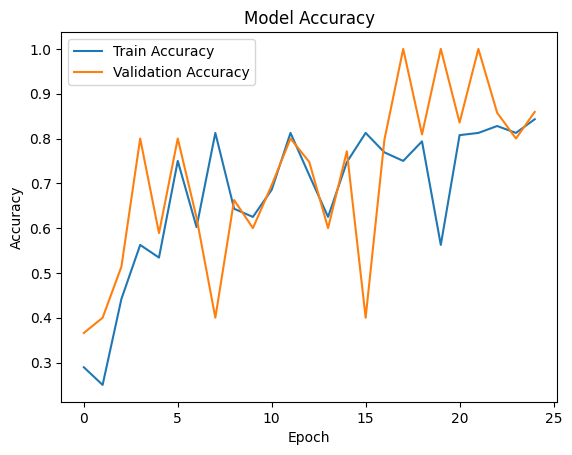

In [15]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


Plot Training and Validation Loss

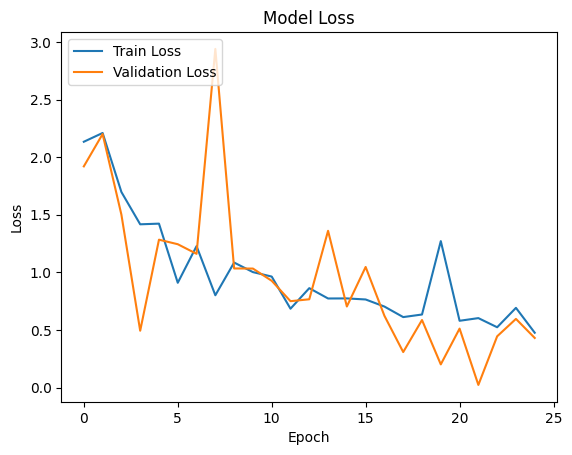

In [16]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


Visuals

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


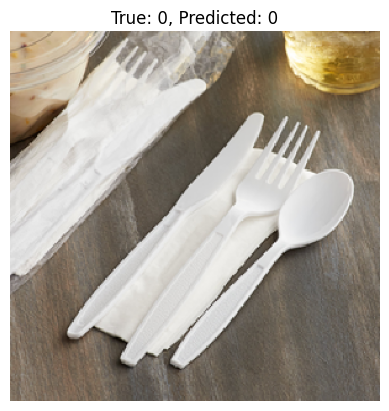

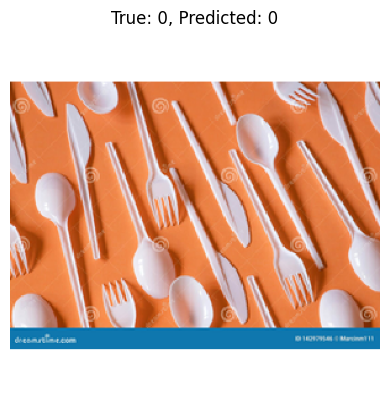

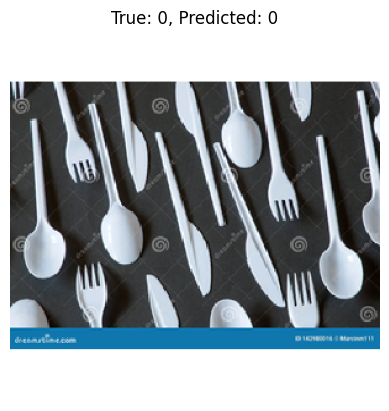

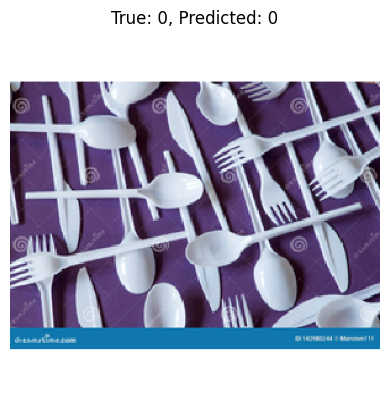

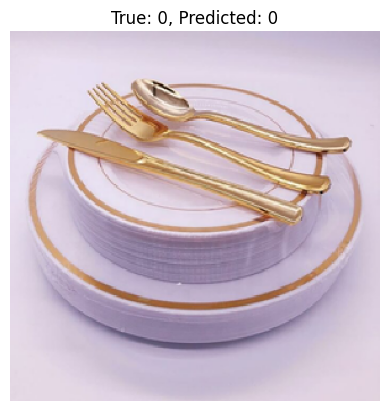

In [17]:
x_test, y_test = next(test_generator)

# Make predictions
predictions = model.predict(x_test)

# Plot the images along with the predicted and true labels
for i in range(5):  # Display 5 images
    plt.imshow(x_test[i])
    true_label = np.argmax(y_test[i])
    predicted_label = np.argmax(predictions[i])
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()


Confusion Matrix

2258/2258 ━━━━━━━━━━━━━━━━━━━━ 292s 129ms/step


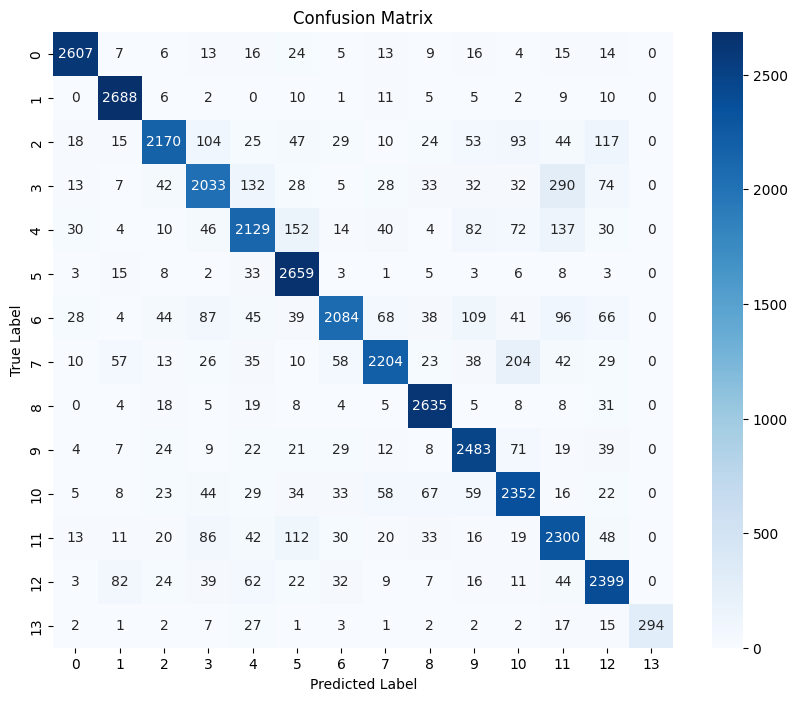

In [18]:
# Cell 14: Confusion Matrix
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
